<a href="https://colab.research.google.com/github/XuxaRP/mvp_machine_learning/blob/main/MVP_MachineLearning_LeonardoFPiato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do Problema - Premissas, hipóteses, restrições e informações sobre o dataset



*   **Introdução sobre o dataset e Definição do problema:**

O dataset Heart failure clinical records Data Set contém informações médicas de 299 pacientes que sofreram de insuficiência cardíaca. Esse conjunto inclui 11 características clínicas (algumas binárias e outras numéricas), o período de acompanhamento, além da variável DEATH_EVENT que indica se o paciente faleceu.

Podemos encontrar características diretamente ligadas a aspectos médicos, como níveis de enzimas, sódio, creatinina e plaquetas no sangue, assim como outras mais gerais como idade, sexo e hábito de fumar.

Os dados foram coletados em 2015 no Hospital Allied no Paquistão.

Nosso principal objetivo é prever a sobrevivência dos pacientes e classificar as características correspondentes aos fatores de risco mais importantes, para que possam ser usadas no foco do tratamento dos riscos que se mostram mais preponderantes no fator óbito. Dessa forma nossa **variável alvo será DEATH_EVENT.**



---




*   **Premissas e Hipóteses**

  -  **Premissas:** Durante um ataque cardíaco o indivíduo tem suas características clínicas drasticamente modificadas. Algumas dessas características chaves foram coletadas no presente estudo e serão usadas para criar e treinar um modelo que possa evidenciar quais características clinicas são críticas durante o evento.

  - **Hipótese:** Este modelo pretende prever a chance de sobrevivência de um paciente que sofre um evento de insuficiencia cardíaca, evidenciando padrões e até mesmo classificando as características para entender quais são os fatores de risco, para que, assim, possa ser utilizado por profissionais da saúde para prever mais rapidamente uma doença cardíaca utilizando como base as características mais prepoderantes no evento, que serão verificadas por este estudo.

*   **Restrições e condições:**
  - **Restrições:** Os dados são relativos a apenas 299 pacientes, o que pode impactar a robustez de nosso resultado. Os pacientes são todos Paquistaneses, é sabido que aspectos antropológicos podem impactar diretamente nos riscos de doenças cardíacas da população, como alimentação e hábitos.

  - **Condições**: Aplicaremos o modelo na população disponível no dataset. Excluiremos a coluna time pois não tem relação com condições do paciente, não sendo relevante para o estudo.



---







#    **Descrição do Dataset:**



1.   **Idade (age):** Refere-se à idade dos pacientes. Medida em anos [40,…, 95].
2.   **Anemia (anaemia)**: Indica se o paciente tem anemia (redução no número de glóbulos vermelhos). Booleana [0,1].
3.   **Creatinina Fosfoquinase (creatinine_phosphokinase)**: É uma enzima presente no sangue e pode ser relevante para avaliar a saúde cardíaca. Medida em mcg/L[23,…, 7861].
4.   **Diabetes (diabetes):** Indica se o paciente tem diabetes. Booleana [0,1].

5.   **Fração de Ejeção (ejection_fraction):** Refere-se à porcentagem de sangue que é bombeada para fora do coração a cada batimento. Medida em porcentagem [14,…, 80].
6.   **Pressão Alta (high_blood_pressure):** Indica se o paciente tem pressão alta. Booleana [0,1].

7.   **Plaquetas (platelets):** São células sanguíneas envolvidas na coagulação. Medida em kiloplaquetas/mL [25.01,…, 850.00].

8.   **Creatinina Sérica (serum_creatinine)**: Nível de creatinina no sangue, usado para avaliar a função renal. Medida em mg/dL [0.50,…, 9.40].
9.   Sódio Sérico (serum_sodium): Concentração de sódio no sangue. Medida em mEq/L [114,…, 148].

10.   **Sexo (sex):** Indica o gênero do paciente (masculino ou feminino). Binário [0,1]
11.   **Tabagismo (smoking):** Indica se o paciente é fumante. Booleana [0,1].

12.   **Tempo (time):** Representa o tempo dispendido em internação/atendimento hospitalar/período de acompanhamento. Medida em dias [4,…, 285].
13.   **Evento de Óbito (DEATH_EVENT):** Indica se o paciente faleceu durante o período de acompanhamento. Booleana [0,1]


# **` Importação e análise exploratória dos dados`**

In [37]:
#Importação de pacotes necessários
import os  # Para interações com o sistema operacional
import numpy as np  # Para manipulação de arrays e cálculos numéricos
import pandas as pd  # Para manipulação de dados tabulares
import warnings  # Para controle de warnings
import seaborn as sns  # Para visualizações estatísticas
import matplotlib.pyplot as plt  # Para criação de gráficos
import plotly.express as px  # Para visualizações interativas
import scipy.stats as stats  # Para funções estatísticas


#Importação de funções adicionais
from sklearn import preprocessing  # Para pré-processamento de dados
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder  # Para codificação e normalização de dados
from sklearn.ensemble import IsolationForest  # Algoritmo para detecção de anomalias
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score  # Para divisão dos dados e validação cruzada
from sklearn.neighbors import KNeighborsClassifier  # Algoritmo KNN
from sklearn.tree import DecisionTreeClassifier  # Algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB  # Algoritmo Naive Bayes
from sklearn.svm import SVC  # Algoritmo SVM
from sklearn.pipeline import Pipeline  # Para criar pipelines de processamento e modelagem
from sklearn.compose import ColumnTransformer  # Para transformar colunas específicas do dataframe
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV #Para realizar busca de hiperparâmetros com validação cruzada
from sklearn.metrics import classification_report, accuracy_score #Para classificar e calcular acurácia
from sklearn.ensemble import RandomForestClassifier #Para usarmos o modelo de Randon forest
from sklearn.ensemble import GradientBoostingClassifier #Idem ao caso acima, para usarmos o Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier #Para usarmos o adaboost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score #para calcular acuracias,precisão e recall
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



import matplotlib  # Estilos de plotagem
matplotlib.style.use('ggplot')  # Usar estilo 'ggplot' para gráficos

warnings.filterwarnings("ignore")  # Ignorar warnings
pd.set_option("display.max_rows", None)  # Mostrar todas as linhas no output do dataframe


# Importação do dataset
url = "https://raw.githubusercontent.com/XuxaRP/MVP_01_teste/main/Heart_base.csv"

# Lendo o arquivo CSV para um dataframe, denomanando nosso dataset como hb
hb = pd.read_csv(url, delimiter=',')




*  Começamos verificando o tamanho do dataset e se há variáveis faltantes, bem como seus tipos:

In [2]:
hb.shape #Analisamos o tamanho do dataset

(299, 13)

In [3]:
hb.isnull().sum() #verificando se há variaveis ausentes

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


Dessa forma temos uma base de dados com 299 linhas e 13 colunas, sem nenhum dado ausente.

Abaixo verificamos os tipos dados, visando identificar necessidade de conversões.

In [4]:
hb.dtypes #Verificando os tipos dos dados

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


Agora vamos ver as cinco primeiras linhas. Isso é importante para identicarmos as medidas utilizadas, por exemplo.

In [5]:
hb.head(5) #Analise das 5 linhas iniciais

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Agora plotamos uma matriz de correlação para entender como as variáveis se relacionam

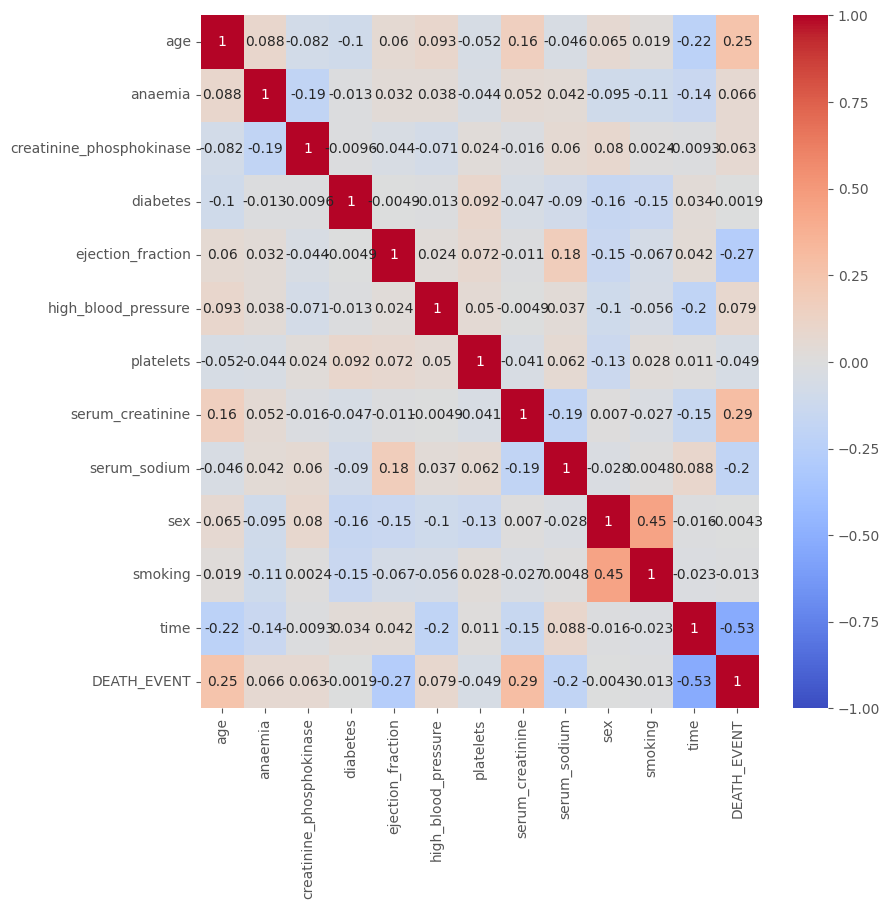

In [6]:
#Plotamos à Análise da matriz de correlação
plt.figure(figsize=(9,9))
sns.heatmap(hb.corr(), vmin=-1, cmap='coolwarm', annot=True);

Verificamos pela matriz de correlação que as características possuem pequenas correlações, exceto sexo e tabagismo. Precisamos tomar uma decisão acerca dessas duas variáveis para que essa correlação não afete nosso modelo. A outra variável com grande correlação, TIME, será excluída pois não trata-se de característica dos pacientes, mas sim tempo de internação, não sendo objeto deste estudo.

Logo abaixo vamos plotar os gráficos de distribuição, separando a visualização em dados numéricos e categóricos.

In [ ]:
#Separando os dados numéricos e categóricos para plotagens de distribuição
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

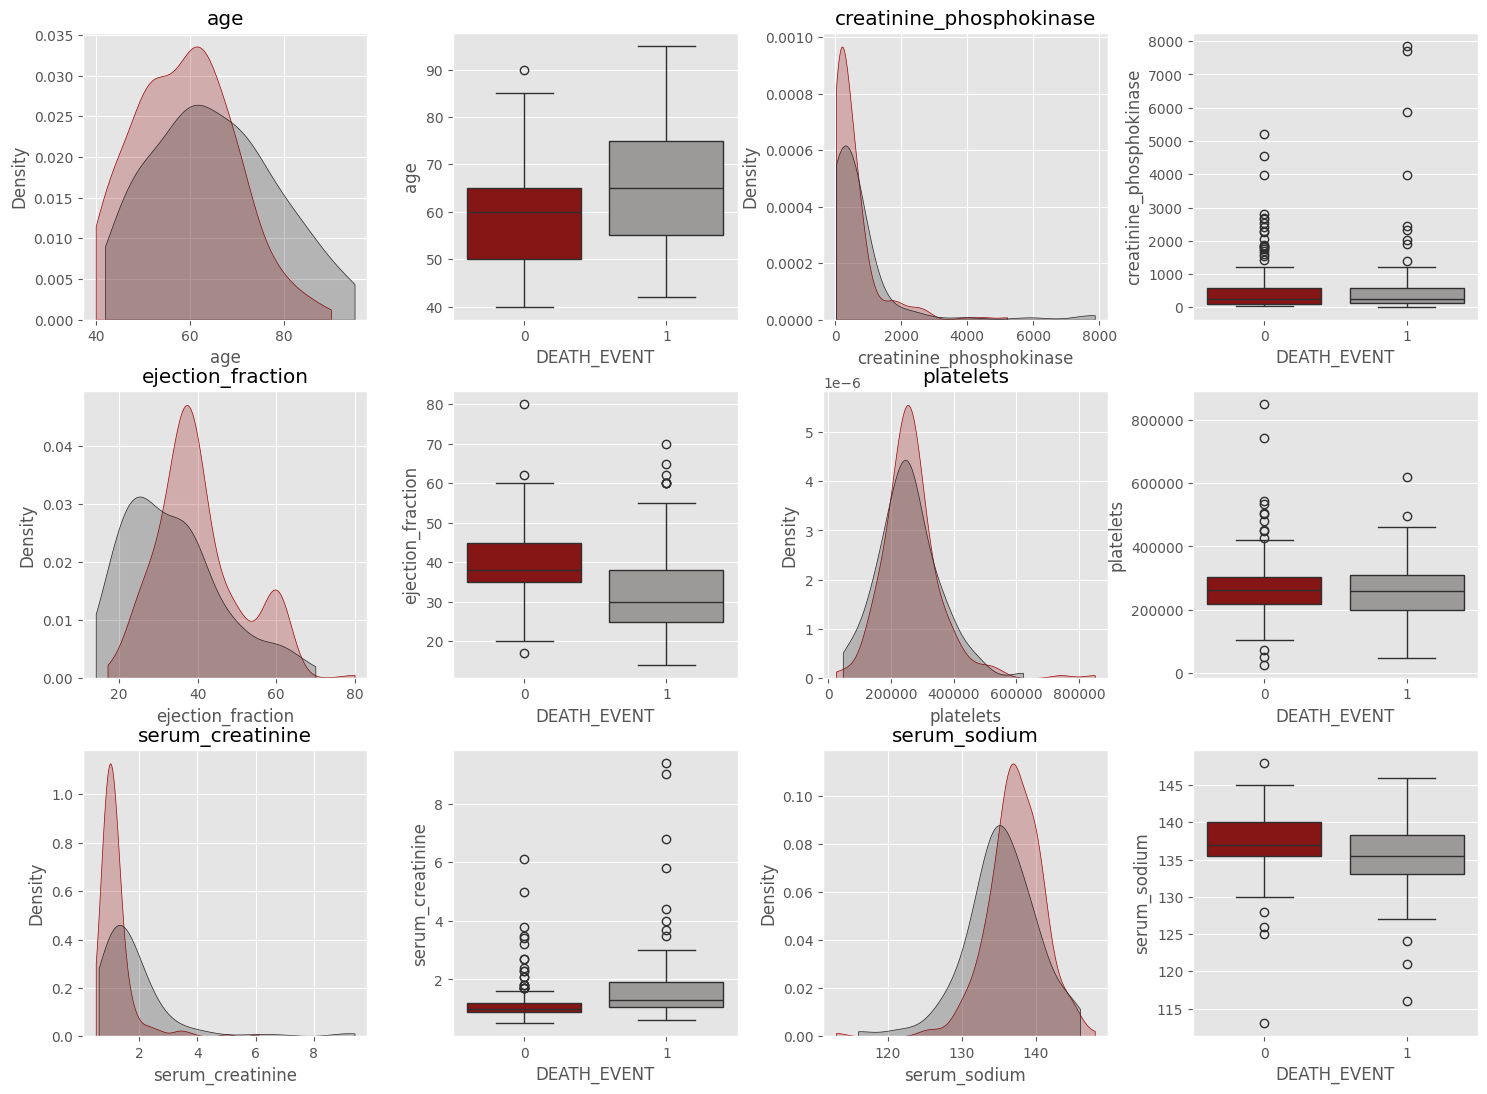

In [ ]:
plt.figure(figsize=(18, 27)) #Analise e plotagem de distribuição das características numéricas

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)

    plt.grid(True)
    plt.title(col)
    sns.kdeplot(hb.loc[hb["DEATH_EVENT"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
    sns.kdeplot(hb.loc[hb["DEATH_EVENT"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y = col, data = hb, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])

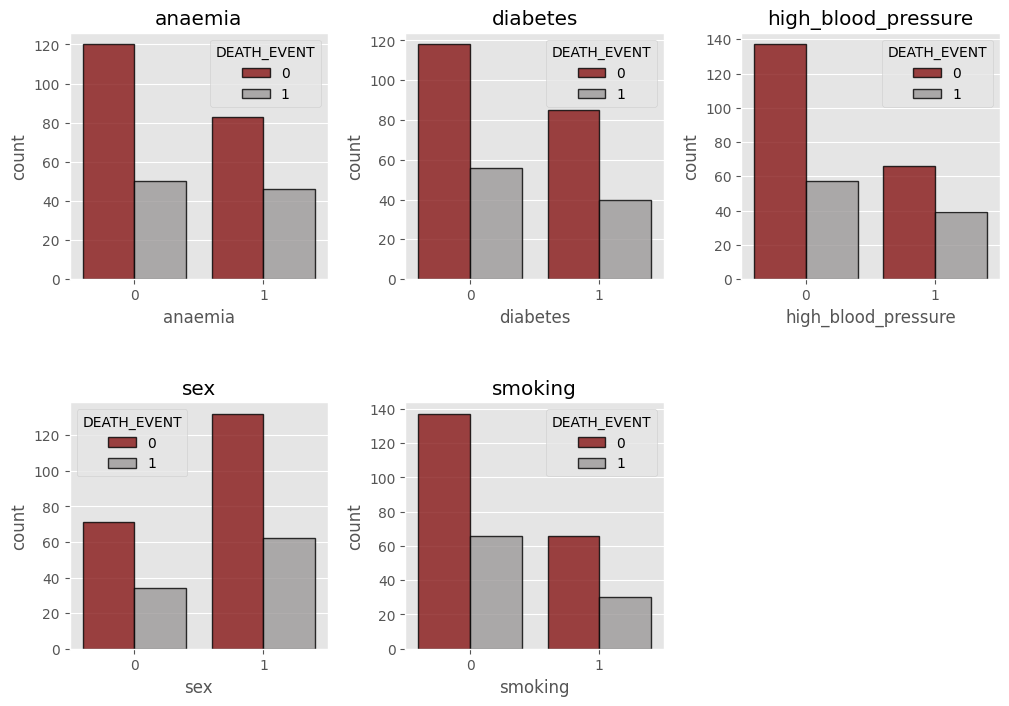

In [ ]:
plt.figure(figsize=(12, 8)) #analise e plotagem da distribuição das variáveis categóricas

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hb, x=col, hue="DEATH_EVENT", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

In [ ]:
# Mostrando as distribuições por sexo
fig=px.histogram(hb,
                 x="age",
                 color="sex",
                 hover_data=hb.columns,
                 title="Distribuição de Idade e sexo",
                 barmode="group")
fig.show()



---



# Preparação de Dados e Feature Selection

Vamos fazer a divisão dos conjunto de dados em subconjuntos dedicados ao treinamento, validação e teste. No nosso caso temos apenmas 299 registros, então o mesmo subconjunto será usado tanto para validação quanto para teste.

Para tanto, vamos dividir em dois conjuntos, normalizados e não normalizados, para comparar como os modelos se comportam em cada tipo de dados e conferir se a normalização melhora a performance do modelo.

In [7]:
train_ratio = 0.75 # Definindo a divisão 75% treino e 25% teste/validação
val_ratio = 0.25

# Divide o conjunto de dados hb em dois subconjuntos normalizados: um para treinamento (hb_train_db) e outro para validação/teste (hb_val_db)
hb_train_db, hb_val_db = train_test_split(hb, train_size=train_ratio, random_state=42)

# Aqui dividindo em subconjuntos não normalizados
unnorm_hb_train_db, unnorm_hb_val_db = train_test_split(hb, train_size=train_ratio, random_state=42)

print("Divisão Holdout:")
print(f"Amostras de Treinamento: {len(hb_train_db)}")
print(f"Amostras de Validação/Teste: {len(hb_val_db)}")


Divisão Holdout:
Amostras de Treinamento: 224
Amostras de Validação/Teste: 75


Vamos estimar a informação mútua - Mutual Information (medida de dependência entre duas variáveis) de cada característica em relação à variável alvo DEATH_EVENT. Isso vai nos auxiliar a identificar quais características têm a maior influência na previsão do evento óbito, permitindo uma seleção mais adequada de características para o modelo de machine learning.

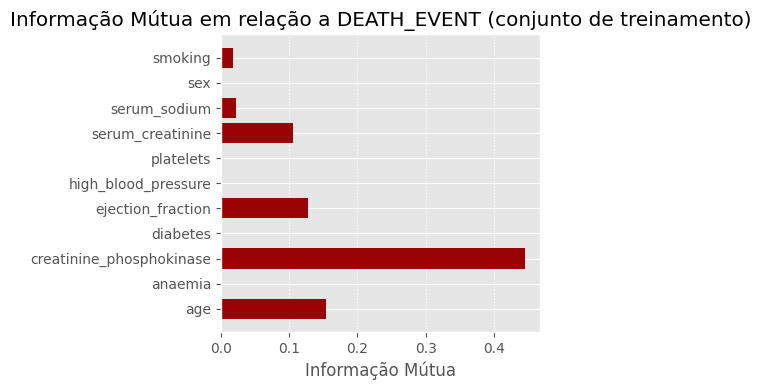

In [8]:
# Definindo as características e a variável alvo para o cálculo da informação mútua
all_features = ["age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction",
                "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking"]

# Calculando a informação mútua para as características em relação ao evento de morte (DEATH_EVENT)
MI = mutual_info_classif(hb_train_db[all_features], hb_train_db["DEATH_EVENT"],
                         n_neighbors=20,
                         discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                         random_state=42)

# Plotando a informação mútua para cada característica
plt.figure(figsize=(5.4, 4))
plt.barh(y=all_features, width=MI, color="#990303")
plt.title("Informação Mútua em relação a DEATH_EVENT (conjunto de treinamento)")
plt.xlabel("Informação Mútua")
plt.gca().xaxis.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


A análise de informação mútua indicou que as variáveis smoking, high_blood_pressure, diabetes e platelets têm pouca influência na variável DEATH_EVENT, assim vamos simplificar nosso modelo removendo essas variáveis. No entanto, manteremos as variáveis sex e anaemia, apesar dos baixos valores de influência na variável alvo, para observar como o modelo lida com a mistura de características contínuas e binárias.

Configuramos as características que desejamos manter e dividimos as variáveis alvo.

In [10]:
# Lista de características a serem mantidas
selected_features = ["age", "anaemia", "creatinine_phosphokinase", "ejection_fraction",
                     "serum_creatinine", "serum_sodium", "sex"]

# Criar novo dataframe com as características selecionadas
X_selected = hb_train_db[selected_features]
X_test_selected = hb_val_db[selected_features]

# Dividir as variáveis alvo
y_train = hb_train_db["DEATH_EVENT"]
y_test = hb_val_db["DEATH_EVENT"]


Agora vamos criar cópias do nosso dataset para efetivar a validação cruzada. Utilizar validação cruzada em modelos médicos é essencial pois torna a avaliação mais confiável e representativo. Além disso, reduz overfitting ao treinar o modelos em diferentes "folds".

In [11]:
# Criar cópias dos datasets de treino e validação para uso na validação cruzada
kfold_train_df, kfold_val_df = hb_train_db[selected_features + ["DEATH_EVENT"]].copy(), hb_val_db[selected_features + ["DEATH_EVENT"]].copy()

# Verificar as colunas dos datasets de treino e validação
print("Colunas do dataset de treino:", kfold_train_df.columns)
print("Colunas do dataset de validação:", kfold_val_df.columns)


Colunas do dataset de treino: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'serum_creatinine', 'serum_sodium', 'sex', 'DEATH_EVENT'],
      dtype='object')
Colunas do dataset de validação: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'ejection_fraction',
       'serum_creatinine', 'serum_sodium', 'sex', 'DEATH_EVENT'],
      dtype='object')


Agora vamos exibir a informação mútua das características selecionadas em relação à variável DEATH_EVENT para cada uma das 5 iterações da validação cruzada. Isso ajudará a validar se as características escolhidas são realmente relevantes.

Informação Mútua em relação a variável DEATH_EVENT (5 folds)


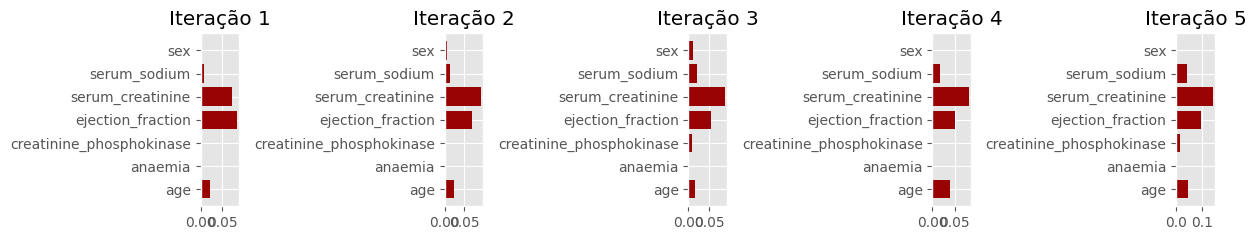

In [12]:
# Criar os folds para a validação cruzada estratificada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(12.5, 2.5))

print("Informação Mútua em relação a variável DEATH_EVENT (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["DEATH_EVENT"])):
    MI = mutual_info_classif(kfold_train_df.iloc[train_idx][selected_features],
                             kfold_train_df.iloc[train_idx]["DEATH_EVENT"], n_neighbors=20,
                             random_state=42)

    plt.subplot(1, 5, i+1)
    plt.title(f"Iteração {i+1}")
    plt.barh(y=selected_features, width=MI, color="#990303", label="test statistic")

plt.tight_layout()
plt.show()



Analisando os gráficos acima podemos confirmar que as variáveis escolhidas são as mais relevantes para o modelo.



---



# Modelagem

 **Vamos fazer a validação cruzada estratificada com múltiplos folds pelos motivos:**

1.   **Variabilidade dos Dados:** Utilizando múltiplos folds, garantimos que cada subconjunto do nosso dataset será usado tanto para treino quanto para validação. Isso ajuda a expor o modelo a diferentes amostras e características dos dados, aumentando a capacidade do modelo de generalizar bem para novos dados.
2.   **Reduzir o Risco de Overfitting:** Ao utilizar validação cruzada, diminuímos o risco de overfitting, pois o modelo não fica dependente de um único conjunto de dados de validação. Em vez disso, ele é avaliado múltiplas vezes em diferentes subconjuntos, garantindo uma avaliação mais confiável do desempenho do modelo.
3. **Estimativa de Desempenho:** A média e o desvio padrão das acurácias obtidas nos diferentes folds fornecem uma estimativa mais confiável e estável do desempenho do modelo, em comparação a usar um único split de treino/teste.
4. **Consistência:** Ao randomizar e misturar os dados entre os folds (com o parâmetro shuffle=True), garantimos que a distribuição dos dados entre os folds é representativa, melhorando a robustez das estimativas de desempenho.



In [13]:
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

In [14]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

Agora vamos avaliar os modelos abaixo, de forma normalizada ou não. Primeiramente vamos usar nossa base com todas as características, e logo em seguinte com as características selecionadas, para então compará-las, tanto normalizadas como não normalizadas. Abaixo sobre os modelos escolhidos:


*   **K-Nearest Neighbors (KNN)**: Simples e eficaz, baseado na proximidade dos dados.
*   **Classification and Regression Trees (CART)**: Fácil de interpretar, baseado em regras de decisão.
*   **Naive Bayes (NB)**: Rápido, baseado no teorema de Bayes e na suposição de independência
*   **Support Vector Machine (SVM)**: Poderoso, baseado na maximização da margem de separação entre classes.



In [15]:
# Substituindo 'hb'
hb_train_db, hb_val_db = train_test_split(hb, train_size=train_ratio, random_state=42)

# Separando as características (X) e o alvo (y)
X_train = hb_train_db.drop(columns=['DEATH_EVENT'])
y_train = hb_train_db['DEATH_EVENT']

# Normalizando os dados
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Definindo KFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez - Dados normalizados
print("Avaliação com dados normalizados")
for name, model in models:
    cv_results = cross_val_score(model, X_train_normalized, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())  # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

# Avaliando um modelo por vez - Dados não normalizados
print("\nAvaliação com dados não normalizados")
results = []  # Resetando os resultados
names = []  # Resetando os nomes

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())  # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

Avaliação com dados normalizados
KNN: 0.758893 (0.060849)
CART: 0.821937 (0.062041)
NB: 0.799407 (0.071716)
SVM: 0.830632 (0.054947)

Avaliação com dados não normalizados
KNN: 0.714625 (0.082561)
CART: 0.826482 (0.056342)
NB: 0.826285 (0.099199)
SVM: 0.710079 (0.017633)


In [16]:
# Definir as características numéricas e categóricas
numeric_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "sex"]

# Pipeline de pré-processamento para variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline de pré-processamento para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar pré-processamentos em um único transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Criar novo dataframe com as características selecionadas
X_selected = hb_train_db[selected_features]
X_test_selected = hb_val_db[selected_features]

# Separar as variáveis alvo
y_train = hb_train_db["DEATH_EVENT"]
y_test = hb_val_db["DEATH_EVENT"]

# Normalizar os dados
X_train_normalized = preprocessor.fit_transform(X_selected)

# Definir KFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez - Dados normalizados
print("Avaliação com dados normalizados")
for name, model in models:
    cv_results = cross_val_score(model, X_train_normalized, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())  # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)

# Avaliando um modelo por vez - Dados não normalizados
print("\nAvaliação com dados não normalizados")
results = []  # Resetando os resultados
names = []  # Resetando os nomes

for name, model in models:
    cv_results = cross_val_score(model, X_selected, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())  # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg)


Avaliação com dados normalizados
KNN: 0.755138 (0.064564)
CART: 0.692095 (0.069949)
NB: 0.741304 (0.065184)
SVM: 0.763636 (0.076878)

Avaliação com dados não normalizados
KNN: 0.724111 (0.067998)
CART: 0.702174 (0.114379)
NB: 0.745652 (0.048675)
SVM: 0.710079 (0.017633)


Abaixo vamos plotar o gráfico para visualizarmos melhor como os modelos se comportaram, sejam normalizados ou não.

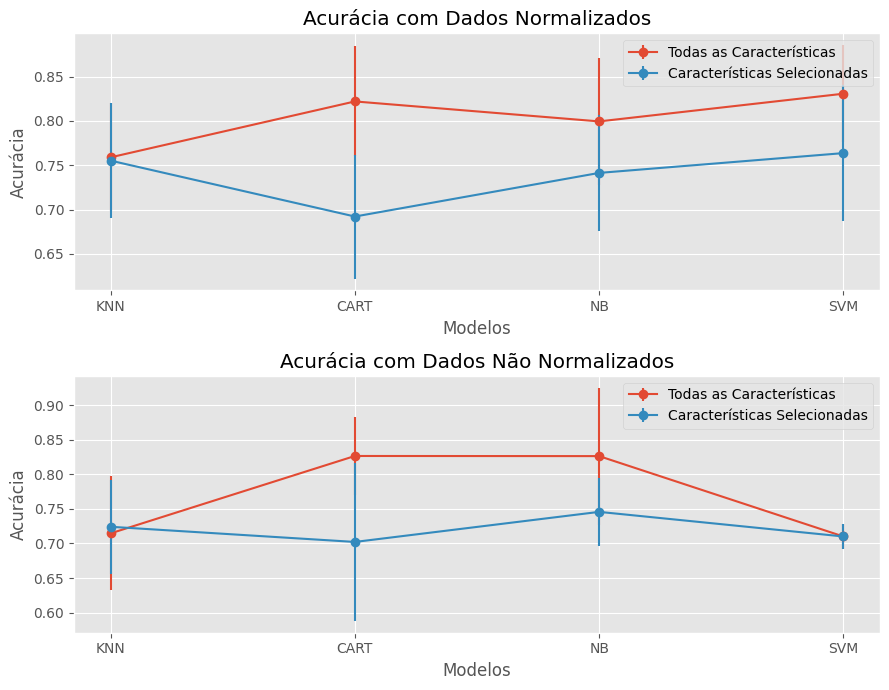

In [17]:
# Dados
model_names = ['KNN', 'CART', 'NB', 'SVM']

# Acurácias e desvios padrões para todas as características
acc_all_normalized = [0.758893, 0.821937, 0.799407, 0.830632]
std_all_normalized = [0.060849, 0.062041, 0.071716, 0.054947]
acc_all_non_normalized = [0.714625, 0.826482, 0.826285, 0.710079]
std_all_non_normalized = [0.082561, 0.056342, 0.099199, 0.017633]

# Acurácias e desvios padrões para características selecionadas
acc_selected_normalized = [0.755138, 0.692095, 0.741304, 0.763636]
std_selected_normalized = [0.064564, 0.069949, 0.065184, 0.076878]
acc_selected_non_normalized = [0.724111, 0.702174, 0.745652, 0.710079]
std_selected_non_normalized = [0.067998, 0.114379, 0.048675, 0.017633]

# Plotando os resultados
x = np.arange(len(model_names))

fig, axs = plt.subplots(2, 1, figsize=(9, 7))

# Gráfico de linhas para dados normalizados
axs[0].errorbar(x, acc_all_normalized, yerr=std_all_normalized, label='Todas as Características', fmt='-o')
axs[0].errorbar(x, acc_selected_normalized, yerr=std_selected_normalized, label='Características Selecionadas', fmt='-o')
axs[0].set_xticks(x)
axs[0].set_xticklabels(model_names)
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('Acurácia')
axs[0].set_title('Acurácia com Dados Normalizados')
axs[0].legend()

# Gráfico de linhas para dados não normalizados
axs[1].errorbar(x, acc_all_non_normalized, yerr=std_all_non_normalized, label='Todas as Características', fmt='-o')
axs[1].errorbar(x, acc_selected_non_normalized, yerr=std_selected_non_normalized, label='Características Selecionadas', fmt='-o')
axs[1].set_xticks(x)
axs[1].set_xticklabels(model_names)
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('Acurácia')
axs[1].set_title('Acurácia com Dados Não Normalizados')
axs[1].legend()

plt.tight_layout()
plt.show()


De modo geral nossos modelos tiveram um melhor desempenho com dados normalizamos, sendo o SVM o com maior acurácias.

In [21]:


# Características numéricas e categóricas
numeric_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "sex"]

# Pipeline de pré-processamento para características numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline de pré-processamento para características categóricas
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar pré-processamentos em um único transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline completo para o modelo KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform'))
])

# Ajustar o pipeline com os dados de treino
pipeline_knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
X_test = hb_val_db[selected_features]
y_test = hb_val_db['DEATH_EVENT']
y_pred_knn = pipeline_knn.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação para KNN (Conjunto de Teste):")
print(classification_report(y_test, y_pred_knn))
print("Acurácia para KNN (Conjunto de Teste):", accuracy_score(y_test, y_pred_knn))


Relatório de Classificação para KNN (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        44
           1       0.71      0.32      0.44        31

    accuracy                           0.67        75
   macro avg       0.69      0.62      0.60        75
weighted avg       0.68      0.67      0.63        75

Acurácia para KNN (Conjunto de Teste): 0.6666666666666666


In [22]:
# Pipeline completo para o modelo CART
pipeline_cart = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1))
])

# Ajustar o pipeline com os dados de treino
pipeline_cart.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_cart = pipeline_cart.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação para CART (Conjunto de Teste):")
print(classification_report(y_test, y_pred_cart))
print("Acurácia para CART (Conjunto de Teste):", accuracy_score(y_test, y_pred_cart))


Relatório de Classificação para CART (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        44
           1       0.58      0.58      0.58        31

    accuracy                           0.65        75
   macro avg       0.64      0.64      0.64        75
weighted avg       0.65      0.65      0.65        75

Acurácia para CART (Conjunto de Teste): 0.6533333333333333


In [23]:
# Pipeline completo para o modelo NB
pipeline_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Ajustar o pipeline com os dados de treino
pipeline_nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_nb = pipeline_nb.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação para NB (Conjunto de Teste):")
print(classification_report(y_test, y_pred_nb))
print("Acurácia para NB (Conjunto de Teste):", accuracy_score(y_test, y_pred_nb))


Relatório de Classificação para NB (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        44
           1       0.64      0.23      0.33        31

    accuracy                           0.63        75
   macro avg       0.63      0.57      0.54        75
weighted avg       0.63      0.63      0.57        75

Acurácia para NB (Conjunto de Teste): 0.6266666666666667


In [24]:
# Pipeline completo para o modelo SVM
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(C=1.0, kernel='rbf', gamma='scale'))
])

# Ajustar o pipeline com os dados de treino
pipeline_svm.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_svm = pipeline_svm.predict(X_test)

# Avaliar o desempenho
print("Relatório de Classificação para SVM (Conjunto de Teste):")
print(classification_report(y_test, y_pred_svm))
print("Acurácia para SVM (Conjunto de Teste):", accuracy_score(y_test, y_pred_svm))


Relatório de Classificação para SVM (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        44
           1       0.68      0.42      0.52        31

    accuracy                           0.68        75
   macro avg       0.68      0.64      0.64        75
weighted avg       0.68      0.68      0.66        75

Acurácia para SVM (Conjunto de Teste): 0.68


In [25]:
# Dados de desempenho dos modelos
data = {
    'Modelo': ['KNN', 'CART', 'NB', 'SVM'],
    'Acurácia': [0.6667, 0.6533, 0.6267, 0.6800],
    'Precisão Classe 0': [0.66, 0.70, 0.62, 0.68],
    'Revocação Classe 0': [0.91, 0.70, 0.91, 0.86],
    'F1-Score Classe 0': [0.76, 0.70, 0.74, 0.76],
    'Precisão Classe 1': [0.71, 0.58, 0.64, 0.68],
    'Revocação Classe 1': [0.32, 0.58, 0.23, 0.42],
    'F1-Score Classe 1': [0.44, 0.58, 0.33, 0.52]
}

# Criando DataFrame
df_results = pd.DataFrame(data)

# Configurando a visualização do DataFrame
pd.set_option('display.precision', 4)

# Exibindo a tabela
print(df_results)



  Modelo  Acurácia  Precisão Classe 0  Revocação Classe 0  F1-Score Classe 0  \
0    KNN    0.6667               0.66                0.91               0.76   
1   CART    0.6533               0.70                0.70               0.70   
2     NB    0.6267               0.62                0.91               0.74   
3    SVM    0.6800               0.68                0.86               0.76   

   Precisão Classe 1  Revocação Classe 1  F1-Score Classe 1  
0               0.71                0.32               0.44  
1               0.58                0.58               0.58  
2               0.64                0.23               0.33  
3               0.68                0.42               0.52  


Dessa forma podemos inferir que os modelos SVM e KNN tiveram os desempenhos mais promissores, com esse último pecando na sensibilidade.

**Analisando o Overfitting nos Modelos**

Para determinar se houve overfitting, vamos comparar o desempenho dos modelos nos conjuntos de treino e teste. O overfitting ocorre quando um modelo tem um desempenho significativamente melhor no conjunto de treino em comparação ao conjunto de teste, indicando que o modelo está "memorizando" os dados de treino em vez de generalizar bem para novos dados.

Comparação dos Resultados dos Modelos

**Resultados de Validação Cruzada (Treino):**

*   KNN (Normalizado): 75.89% (6.08%)
*   CART (Normalizado): 82.19% (6.20%)
*   NB (Normalizado): 79.94% (7.17%)
*   SVM (Normalizado): 83.06% (5.49%)

**Resultados no Conjunto de Teste:**

*   KNN:
    Acurácia: 66.67% // F1-Score (Classe 1): 44%

*   CART: Acurácia: 65.33% // F1-Score (Classe 1): 58%

*   NB:Acurácia: 62.67% // F1-Score (Classe 1): 33%

*   SVM:Acurácia: 68.00% // F1-Score (Classe 1): 52%

**Observações de Overfitting**

**KNN:** Há uma diferença considerável entre a acurácia de validação (75.89%) e a acurácia no conjunto de teste (66.67%), sugerindo possível overfitting.

**CART**: A diferença entre a acurácia de validação (82.19%) e a acurácia no conjunto de teste (65.33%) também indica possível overfitting.

**NB:** Embora a diferença de desempenho entre treino e teste seja menor, a baixa revocação e F1-score para a classe 1 no**Resultados de Validação Cruzada (Treino):**

*   KNN (Normalizado): 75.89% (6.08%)
*   CART (Normalizado): 82.19% (6.20%)
*   NB (Normalizado): 79.94% (7.17%)
*   SVM (Normalizado): 83.06% (5.49% conjunto de teste podem sugerir que o modelo não está generalizando bem.

**SVM:** Este modelo tem a menor diferença entre treino e teste, sugerindo que ele pode estar generalizando melhor em comparação aos outros.

**Desempenho em Classes Minoritárias:**

Todos os modelos mostram dificuldades em classificar corretamente a classe 1 (ocorrência de evento de morte), especialmente no conjunto de teste. Isso é um indicativo de que os modelos podem estar ajustando-se bem ao padrão dominante do dataset (classe 0) e menos ao padrão minoritário (classe 1).



---



# Escolha do Modelo

Com base nas análises realizadas, **a melhor solução encontrada foi o modelo Support Vector Machine (SVM**). Vamos aos argumentos pela escolha do modelo.

Acuracia:


*   **Treino (Validação Cruzada)**: A SVM apresentou uma acurácia média de 83.06% nos dados normalizados durante a validação cruzada.
*   **Teste:** A SVM obteve uma acurácia de 68% no conjunto de teste. Essa diferença é moderada, sugerindo um bom equilíbrio entre desempenho e generalização.

**Sensibilidade e F1-Score da Classe Minoritária (1):**

O modelo SVM teve um F1-score de 52% e uma sensibilidade de 42% para a classe minoritária (ocorrência de evento de morte). Embora esses números ainda indiquem um certo desafio na identificação da classe 1, são superiores aos apresentados por outros modelos como KNN, NB e CART.

**Consistência:**

O SVM apresentou consistência tanto nos dados de treino quanto de teste, com uma diferença menor entre as métricas de desempenho, indicando que o modelo é menos suscetível a overfitting em comparação aos outros modelos testados.

**Razões para o Sucesso do SVM:**

O uso do kernel RBF (Radial Basis Function) permite que o SVM capture padrões complexos nos dados, ajudando a modelar não-linearidades que podem existir nas características.

**Margem Máxima:**

A característica intrínseca do SVM de maximizar a margem entre as classes garante que o modelo é robusto e menos propenso a overfitting, pois se foca em encontrar a linha de separação mais otimizada possível entre as classes.

**Generalização:**

A SVM tende a generalizar bem para novos dados, o que é refletido na acurácia relativamente alta no conjunto de teste. Isso é crucial para a aplicação prática, onde o modelo será usado em dados não vistos anteriormente.

Com isso, partimos para tentar otimizar o modelo.



# Otimização do Modelo

Vamos utilizar a técnica de Grid Search que envolve a definição de um conjunto de possíveis valores para cada hiperparâmetro e a avaliação de todas as combinações possíveis desses valores. É um método eficaz quando o conjunto de hiperparâmetros não é muito grande, como é o nosso caso

In [26]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_normalized, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores hiperparâmetros: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Melhor acurácia: 0.7853754940711463


Com essa configuração, o modelo SVM alcançou uma acurácia de aproximadamente 78,54% na validação cruzada. Isso representa uma evolução de desempenho comparado aos valores anteriores.

Agora vamos treinar novamente o modelo implantando os hiperparametros:



In [27]:

# Definir o modelo com os melhores hiperparâmetros
best_svm = SVC(C=1, kernel='sigmoid', gamma='scale')

# Criar o pipeline com o pré-processamento e o modelo
pipeline_best_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_svm)
])

# Ajustar o pipeline com os dados de treino
pipeline_best_svm.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_best_svm = pipeline_best_svm.predict(X_test)

# Avaliar o desempenho no conjunto de teste
print("Relatório de Classificação para o SVM Otimizado (Conjunto de Teste):")
print(classification_report(y_test, y_pred_best_svm))
print("Acurácia para o SVM Otimizado (Conjunto de Teste):", accuracy_score(y_test, y_pred_best_svm))


Relatório de Classificação para o SVM Otimizado (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        44
           1       0.67      0.32      0.43        31

    accuracy                           0.65        75
   macro avg       0.66      0.60      0.59        75
weighted avg       0.66      0.65      0.62        75

Acurácia para o SVM Otimizado (Conjunto de Teste): 0.6533333333333333


A acurácia geral de 65,33% é um pouco inferior ao desempenho do SVM antes da otimização (68%), o que significação que a otimização não melhorou a capacidade do modelo de generalizar para novos dados no conjunto de teste.

Vamos testar** Ensemble Methods** para tentar melhorar nosso modelo:




**1.   Random Forest**

In [28]:
# Definir o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Criar o pipeline com o pré-processamento e o modelo
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Ajustar o pipeline com os dados de treino
pipeline_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = pipeline_rf.predict(X_test)

# Avaliar o desempenho no conjunto de teste
print("Relatório de Classificação para Random Forest (Conjunto de Teste):")
print(classification_report(y_test, y_pred_rf))
print("Acurácia para Random Forest (Conjunto de Teste):", accuracy_score(y_test, y_pred_rf))


Relatório de Classificação para Random Forest (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.70      0.80      0.74        44
           1       0.64      0.52      0.57        31

    accuracy                           0.68        75
   macro avg       0.67      0.66      0.66        75
weighted avg       0.68      0.68      0.67        75

Acurácia para Random Forest (Conjunto de Teste): 0.68




**2.   Gradient Boosting**



In [29]:
# Definir o modelo Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Criar o pipeline com o pré-processamento e o modelo
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gb)
])

# Ajustar o pipeline com os dados de treino
pipeline_gb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_gb = pipeline_gb.predict(X_test)

# Avaliar o desempenho no conjunto de teste
print("Relatório de Classificação para Gradient Boosting (Conjunto de Teste):")
print(classification_report(y_test, y_pred_gb))
print("Acurácia para Gradient Boosting (Conjunto de Teste):", accuracy_score(y_test, y_pred_gb))


Relatório de Classificação para Gradient Boosting (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.70      0.86      0.78        44
           1       0.71      0.48      0.58        31

    accuracy                           0.71        75
   macro avg       0.71      0.67      0.68        75
weighted avg       0.71      0.71      0.69        75

Acurácia para Gradient Boosting (Conjunto de Teste): 0.7066666666666667




**3.   AdaBoost**




In [30]:
# Definir o modelo AdaBoost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Criar o pipeline com o pré-processamento e o modelo
pipeline_ada = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ada)
])

# Ajustar o pipeline com os dados de treino
pipeline_ada.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_ada = pipeline_ada.predict(X_test)

# Avaliar o desempenho no conjunto de teste
print("Relatório de Classificação para AdaBoost (Conjunto de Teste):")
print(classification_report(y_test, y_pred_ada))
print("Acurácia para AdaBoost (Conjunto de Teste):", accuracy_score(y_test, y_pred_ada))


Relatório de Classificação para AdaBoost (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.66      0.89      0.76        44
           1       0.69      0.35      0.47        31

    accuracy                           0.67        75
   macro avg       0.67      0.62      0.61        75
weighted avg       0.67      0.67      0.64        75

Acurácia para AdaBoost (Conjunto de Teste): 0.6666666666666666




4.    **XGBoost **




In [33]:
# Definir o modelo XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Criar o pipeline com o pré-processamento e o modelo
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

# Ajustar o pipeline com os dados de treino
pipeline_xgb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgb = pipeline_xgb.predict(X_test)

# Avaliar o desempenho no conjunto de teste
print("Relatório de Classificação para XGBoost (Conjunto de Teste):")
print(classification_report(y_test, y_pred_xgb))
print("Acurácia para XGBoost (Conjunto de Teste):", accuracy_score(y_test, y_pred_xgb))


Relatório de Classificação para XGBoost (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.70      0.80      0.74        44
           1       0.64      0.52      0.57        31

    accuracy                           0.68        75
   macro avg       0.67      0.66      0.66        75
weighted avg       0.68      0.68      0.67        75

Acurácia para XGBoost (Conjunto de Teste): 0.68


**Considerações finais sobre Ensenble Methods:** Com base nesses resultados, o Gradient Boosting é o método de ensemble que oferece o melhor desempenho geral. Ele apresenta uma acurácia mais alta e melhores métricas para a classe minoritária (ocorrência de evento de morte), o que é crucial para lidar com o desbalanceamento de nosso dataset.

Abaixo temo o Código para Otimização de Hiperparâmetros com Grid Search e Gradient Boosting:

### **Atenção, código abaixo com execução LENTA ( 9 minutos )**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search_gb.fit(X_train_normalized, y_train)

print("Melhores hiperparâmetros para Gradient Boosting:", grid_search_gb.best_params_)
print("Melhor acurácia para Gradient Boosting:", grid_search_gb.best_score_)


Melhores hiperparâmetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0.8}
Melhor acurácia para Gradient Boosting: 0.8033596837944664


A otimização dos hiperparâmetros para o Gradient Boosting resultou em uma acurácia de aproximadamente 80.34% durante a validação cruzada, resultando em uma grande evolução.

Agora vamos retreinar o modelo



In [34]:
# Definir o modelo com os melhores hiperparâmetros
best_gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=50, subsample=0.8, random_state=42)

# Criar o pipeline com o pré-processamento e o modelo
pipeline_best_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_gb)
])

# Ajustar o pipeline com os dados de treino
pipeline_best_gb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_best_gb = pipeline_best_gb.predict(X_test)

# Avaliar o desempenho no conjunto de teste
print("Relatório de Classificação para o Gradient Boosting Otimizado (Conjunto de Teste):")
print(classification_report(y_test, y_pred_best_gb))
print("Acurácia para o Gradient Boosting Otimizado (Conjunto de Teste):", accuracy_score(y_test, y_pred_best_gb))


Relatório de Classificação para o Gradient Boosting Otimizado (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        44
           1       0.73      0.52      0.60        31

    accuracy                           0.72        75
   macro avg       0.72      0.69      0.69        75
weighted avg       0.72      0.72      0.71        75

Acurácia para o Gradient Boosting Otimizado (Conjunto de Teste): 0.72


**Análise de Desempenho do Gradient Boosting Otimizado no Conjunto de Teste:**


**1.   Classe 0 (não ocorrência de evento de morte):**

O modelo performa bem, com alta revocação de 86% e F1-score de 78%.

**2.   Classe 1 (ocorrência de evento de morte):**

O desempenho para a Classe 1 é consideravelmente bom, com uma precisão de 73% e um F1-score de 60%. A revocação de 52% indica que o modelo ainda pode melhorar na detecção de todos os casos da Classe 1.

**3.   Acurácia Geral:**

A acurácia geral de 72% é um indicativo forte de um bom ajuste entre sensibilidade e especificidade no conjunto de teste.

Abaixamos vamos comparar o desempenho dos modelos para justificar nossa escolha final pelo Gradient Boost

In [35]:
# Dados de desempenho dos modelos
data = {
    'Modelo': ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost'],
    'Acurácia': [0.68, 0.72, 0.67, 0.68],
    'Precisão Classe 0': [0.70, 0.72, 0.66, 0.70],
    'Revocação Classe 0': [0.80, 0.86, 0.89, 0.80],
    'F1-Score Classe 0': [0.74, 0.78, 0.76, 0.74],
    'Precisão Classe 1': [0.64, 0.73, 0.69, 0.64],
    'Revocação Classe 1': [0.52, 0.52, 0.35, 0.52],
    'F1-Score Classe 1': [0.57, 0.60, 0.47, 0.57]
}

# Criando DataFrame
df_results = pd.DataFrame(data)

# Exibindo a tabela
print(df_results)


              Modelo  Acurácia  Precisão Classe 0  Revocação Classe 0  \
0      Random Forest      0.68               0.70                0.80   
1  Gradient Boosting      0.72               0.72                0.86   
2           AdaBoost      0.67               0.66                0.89   
3            XGBoost      0.68               0.70                0.80   

   F1-Score Classe 0  Precisão Classe 1  Revocação Classe 1  F1-Score Classe 1  
0               0.74               0.64                0.52               0.57  
1               0.78               0.73                0.52               0.60  
2               0.76               0.69                0.35               0.47  
3               0.74               0.64                0.52               0.57  


# Avaliação de Resultados



## Escolha das Métricas de avaliação



**1.   Acurácia**

A acurácia mede a proporção de todas as predições corretas (tanto verdadeiros positivos quanto verdadeiros negativos) em relação ao número total de casos. É uma métrica básica que dá uma visão geral do desempenho do modelo

**2.   Precisão**

No contexto de prever eventos de morte, alta precisão significa que a maioria das predições de eventos de morte são corretas, o que é crucial para minimizar intervenções desnecessárias.

**3.   Revocação**

Esta métrica é crítica em problemas de saúde, pois um alto valor de revocação garante que a maioria dos eventos de morte sejam identificados. Isso é essencial para intervenções médicas preventivas, que é o grande objetivo de nosso modelo.

**4.   F1 Score**

É útil quando precisamos balancear precisão e revocação, especialmente em contextos desbalanceados como o nosso, onde eventos de morte são menos frequentes.

**5.   AUC - ROC**

Fornece uma visão geral da capacidade do modelo em classificar corretamente os eventos de morte em comparação com os não eventos, independentemente de um limiar específico de predição. É particularmente útil para avaliar modelos em datasets desbalanceados, como o nosso.

Abaixo vamos calcular essas métricas

In [36]:
# Supondo que y_test e y_pred_gb são suas variáveis de teste e predições do modelo Gradient Boosting otimizado
accuracy = accuracy_score(y_test, y_pred_best_gb)
precision = precision_score(y_test, y_pred_best_gb)
recall = recall_score(y_test, y_pred_best_gb)
f1 = f1_score(y_test, y_pred_best_gb)
auc_roc = roc_auc_score(y_test, pipeline_best_gb.predict_proba(X_test)[:, 1])

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Acurácia: 0.7200
Precisão: 0.7273
Revocação: 0.5161
F1-Score: 0.6038
AUC-ROC: 0.7830


O modelo Gradient Boosting otimizado apresentou um desempenho sólido, equilibrando precisão e revocação para fornecer resultados robustos. As métricas indicam que o modelo é eficaz em detectar eventos de morte, embora haja espaço para melhorias na revocação para garantir que mais eventos de morte sejam identificados corretamente.

# Treinando e testando o modelo

In [38]:
# Definir o modelo com os melhores hiperparâmetros
best_gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=50, subsample=0.8, random_state=42)

# Criar o pipeline com o pré-processamento e o modelo
pipeline_best_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_gb)
])

# Ajustar o pipeline com todos os dados de treino
pipeline_best_gb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_best_gb = pipeline_best_gb.predict(X_test)

# Avaliar o desempenho no conjunto de teste
accuracy = accuracy_score(y_test, y_pred_best_gb)
precision = precision_score(y_test, y_pred_best_gb)
recall = recall_score(y_test, y_pred_best_gb)
f1 = f1_score(y_test, y_pred_best_gb)
auc_roc = roc_auc_score(y_test, pipeline_best_gb.predict_proba(X_test)[:, 1])

# Exibir o relatório de classificação e as métricas
print("Relatório de Classificação para o Gradient Boosting Otimizado (Conjunto de Teste):")
print(classification_report(y_test, y_pred_best_gb))
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Revocação: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")


Relatório de Classificação para o Gradient Boosting Otimizado (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        44
           1       0.73      0.52      0.60        31

    accuracy                           0.72        75
   macro avg       0.72      0.69      0.69        75
weighted avg       0.72      0.72      0.71        75

Acurácia: 0.7200
Precisão: 0.7273
Revocação: 0.5161
F1-Score: 0.6038
AUC-ROC: 0.7830


O modelo Gradient Boosting otimizado apresentou um desempenho sólido e equilibrado. Ele é eficaz em prever eventos de morte, embora ainda haja espaço para melhorias, especialmente na revocação da classe minoritária. As métricas de precisão e AUC-ROC indicam que o modelo faz um bom trabalho em classificar corretamente os eventos, minimizando falsos positivos e capturando um número significativo de eventos reais.

# Overfitting

Baseado na análise do desempenho do modelo Gradient Boosting otimizado em ambos os conjuntos de treino e teste, não há indicações significativas de overfitting.

1. **Acurácia**

   **Validação Cruzada (Treino):** Aproximadamente 80.34% Versus Conjunto de Teste: 72%

A diferença entre as acurácias de treino e teste é moderada. Uma diferença excessiva poderia indicar overfitting, o que não é o caso.

2. **Desempenho nas Classes Minoritárias**
O modelo manteve uma precisão e revocação relativamente equilibradas. Para um problema desbalanceado como do nosso dataset, um modelo que exibisse alta precisão e revocação apenas no conjunto de treino e não no teste poderia indicar overfitting

Embora o Gradient Boosting apresente uma diferença de desempenho entre os conjuntos de treino e teste, essa diferença é esperada e não indica um caso claro de overfitting. O modelo mantém um bom equilíbrio e desempenho nas métricas chave, mostrando que ele não está apenas memorizando os dados de treino, mas também generalizando bem para novos dados.


# Comparando os modelos

In [39]:
# Dados de desempenho dos modelos
data = {
    'Modelo': ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'SVM Otimizado'],
    'Acurácia': [0.68, 0.72, 0.67, 0.68, 0.6533],
    'Precisão Classe 0': [0.70, 0.72, 0.66, 0.70, 0.65],
    'Revocação Classe 0': [0.80, 0.86, 0.89, 0.80, 0.89],
    'F1-Score Classe 0': [0.74, 0.78, 0.76, 0.74, 0.75],
    'Precisão Classe 1': [0.64, 0.73, 0.69, 0.64, 0.67],
    'Revocação Classe 1': [0.52, 0.52, 0.35, 0.52, 0.32],
    'F1-Score Classe 1': [0.57, 0.60, 0.47, 0.57, 0.43],
    'AUC-ROC': [None, 0.7830, None, None, None]  # Adicione AUC-ROC para outros modelos se disponível
}

# Criando DataFrame
df_results = pd.DataFrame(data)

# Exibindo a tabela
print(df_results)


              Modelo  Acurácia  Precisão Classe 0  Revocação Classe 0  \
0      Random Forest    0.6800               0.70                0.80   
1  Gradient Boosting    0.7200               0.72                0.86   
2           AdaBoost    0.6700               0.66                0.89   
3            XGBoost    0.6800               0.70                0.80   
4      SVM Otimizado    0.6533               0.65                0.89   

   F1-Score Classe 0  Precisão Classe 1  Revocação Classe 1  \
0               0.74               0.64                0.52   
1               0.78               0.73                0.52   
2               0.76               0.69                0.35   
3               0.74               0.64                0.52   
4               0.75               0.67                0.32   

   F1-Score Classe 1  AUC-ROC  
0               0.57      NaN  
1               0.60    0.783  
2               0.47      NaN  
3               0.57      NaN  
4               0.43  

Vamos plotar os dados para termos uma melhor visualização:

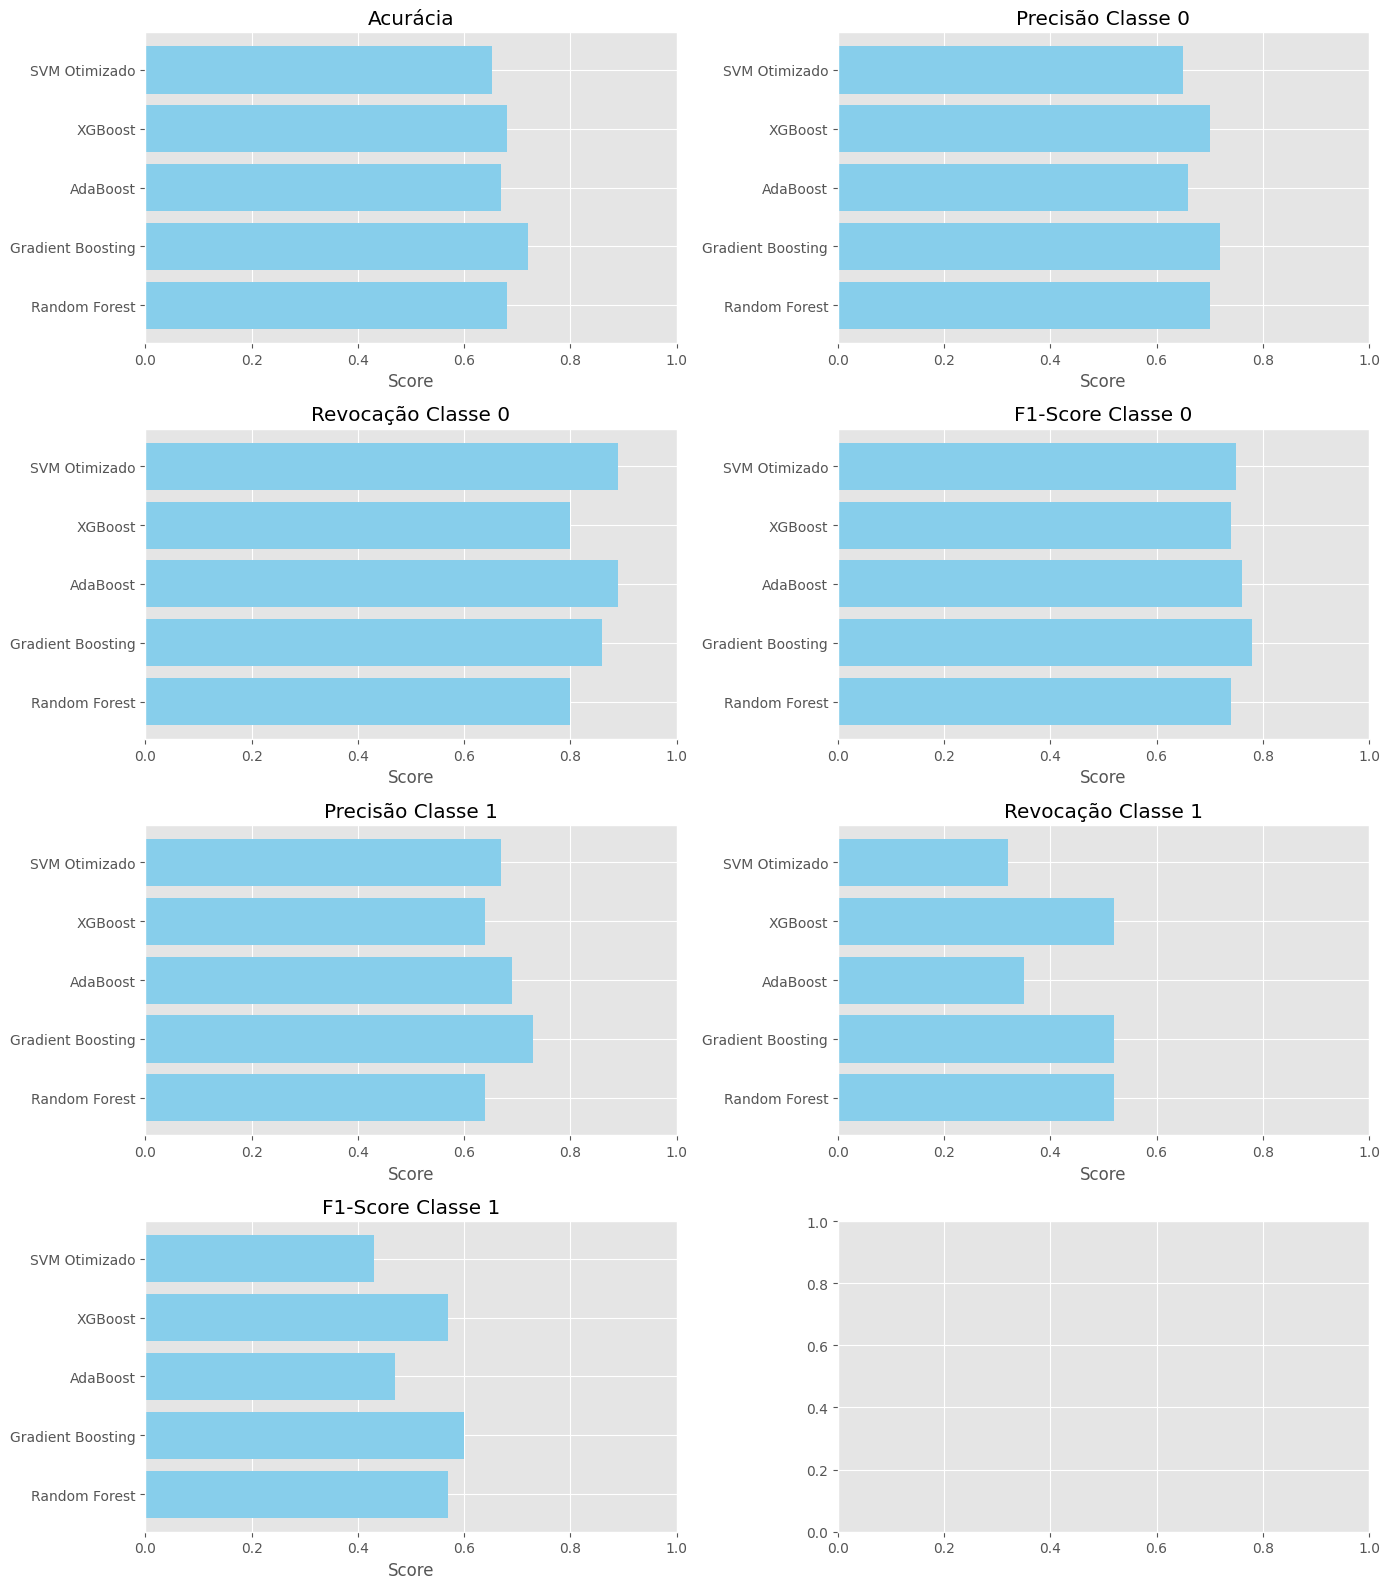

In [42]:
# Definindo as métricas para plotagem
metrics = ['Acurácia', 'Precisão Classe 0', 'Revocação Classe 0', 'F1-Score Classe 0',
           'Precisão Classe 1', 'Revocação Classe 1', 'F1-Score Classe 1']

# Plotando os gráficos
fig, axs = plt.subplots(4, 2, figsize=(14, 16))
axs = axs.ravel()

for i, metric in enumerate(metrics):
    axs[i].barh(df['Modelo'], df[metric], color='skyblue')
    axs[i].set_title(metric)
    axs[i].set_xlabel('Score')
    axs[i].set_xlim(0, 1)
    axs[i].grid(True)

plt.tight_layout()
plt.show()


O Gradient Boosting se destaca como o melhor modelo para este problema, apresentando a maior acurácia e o melhor equilíbrio entre precisão e revocação para ambas as classes. Seu alto valor de AUC-ROC também indica uma forte capacidade de discriminação entre classes.

Além disso teve mais robustez demonstrando menos sinais de overfitting em comparação com outros modelos, mantendo um desempenho estável tanto no conjunto de treino quanto no conjunto de teste.

# Conclusão

Pudemos confirmar que as características **fração de ejeção e  creatinina sérica** como as duas  mais relevantes para serem verificadas num caso de insuficiência cardíaca. Nosso modelo de Machine Learning confirmou a relevância da classificação dessas características. Nosso modelo poderia ser usado para verificação do grau de gravidade e risco de morte de nosso paciencia com base nessas duas varíaveis.

Nosso modelo endossou o que foi verificado no artigo original dos autores Chicco e Jurman. Contudo precisamos ter cautela em seu uso devido a limitação dos dados, devido a sua pequena quantidade e serem indivíduos com características antropológicas semelhantes.

Durante o processo testamos vários modelos e, por fim, decidimos pelo uso do Gradient Boosting devido seus melhores resultados, destacando-se não sofrer com overtitting, e sua acurácia de 72%